# Building a Machine Learning model from scratch
## Breast cancer classification based on pathological features
---

### Coded by: Mostafa Yazdanpanah

[My Linkdin Profile](https://www.linkedin.com/in/mostafa-yazdanpanah-2511a6243/)

**Email: yazdanpanah.m@sbmu.ac.ir**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Breast Cancer Wisconsin

You can find the dataset and the information about it on the following link:

[Breast Cancer Wisconsin](https://archive-beta.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+original#Attributes)

---

In [2]:
# Loading the dataset from the repository
# Note that you must first download the dataset and then re-save it in csv format.
# Remember to change the path if your dataset is stored in diffrent location than your notebook.

path = 'breast-cancer.csv'
data = pd.read_csv(path) # Importing the data in a DataFrame format of pandas
data.head  # Watching the first and last few rows of dataset

<bound method NDFrame.head of      1000025  5   1  1.1  1.2  2 1.3   3  1.4  1.5  2.1
0    1002945  5   4    4    5  7  10   3    2    1    2
1    1015425  3   1    1    1  2   2   3    1    1    2
2    1016277  6   8    8    1  3   4   3    7    1    2
3    1017023  4   1    1    3  2   1   3    1    1    2
4    1017122  8  10   10    8  7  10   9    7    1    4
..       ... ..  ..  ...  ... ..  ..  ..  ...  ...  ...
693   776715  3   1    1    1  3   2   1    1    1    2
694   841769  2   1    1    1  2   1   1    1    1    2
695   888820  5  10   10    3  7   3   8   10    2    4
696   897471  4   8    6    4  3   4  10    6    1    4
697   897471  4   8    8    5  4   5  10    4    1    4

[698 rows x 11 columns]>

**As you see this dataset has no column names. If you go to the repository page you will see the name of the columns.
Before move on we will specify the column names and setting the ID column to be the index column.**

---

In [3]:
# Name of columns
col_names =  ['ID','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape',
                'Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin',
                'Normal Nucleoli','Mitoses','Class'
            ]

# setting the name of columns to the dataframe
data.columns = col_names

# Setting the index of dataframe to the ID of patints
data.set_index = data['ID']


# Looking for missing values. Uncomment the line below to see if there is missing value or not.
## data.isna()



**In the following cell we will make a function to see the number of unique values in each column of our data and the range of them**

---

In [4]:
# Function for evaluating unique values of columns and their range.
def Unique_values(df,col):
    """
    It takes two arguments, the first one is the name of DataFrame
    and the second one is the name of column.
    It returns an f string with the data related to the uniqeness of
    that column values.
    
    Inputs:
            df = DataFrame name
            col = Column name
    
    """
    num_unique = df[col].nunique() # number of unique values 
    lower_range = df[col].min() # The lowest value in that column
    upper_range = df[col].max() # The largest value in that column
    
    return f"|{col}| has {num_unique} unique values from {lower_range} to {upper_range}"

# iterating through column names and using Unique_values fuction.
for col in col_names:
    print(Unique_values(data,col))

|ID| has 644 unique values from 61634 to 13454352
|Clump Thickness| has 10 unique values from 1 to 10
|Uniformity of Cell Size| has 10 unique values from 1 to 10
|Uniformity of Cell Shape| has 10 unique values from 1 to 10
|Marginal Adhesion| has 10 unique values from 1 to 10
|Single Epithelial Cell Size| has 10 unique values from 1 to 10
|Bare Nuclei| has 11 unique values from 1 to ?
|Bland Chromatin| has 10 unique values from 1 to 10
|Normal Nucleoli| has 10 unique values from 1 to 10
|Mitoses| has 9 unique values from 1 to 10
|Class| has 2 unique values from 2 to 4


**As you probably saw the information of dataset, the classes are divided into two diffrent class:**
- 4  malignant
- 2  benign

**For training the model in binary classification we must have label 1 and 0, 1 for malignant and 0 for bening. So we will do it with "apply" method in pandas.**

[apply method documentaion](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)

---

In [5]:
# Class column consists of two number 2 for benign tumor and 4 for malignant. We use a function to turn benign tumors
# to 0 and the malignant to 1.
# Read the documentaion for apply method (You can see the link above)
def change_class(value):
    """
    takes the value of a column and return
    0 if the tumor is benign and 1 if the
    tumor is malignant.
    
    Input:
            value: values of that column (you don't need to pass this arg, Pandas will do it itself.)
    """
    if value == 2:  # benign classification
        return 0
    else:            # malinant classification
        return 1
        
# Ussing apply method to rewrite the class column
data['Class'] = data['Class'].apply(change_class)

**We are closing to the final stage of data manipulation. We will remove some features for avoing the overfitting problem. You can change these.**

---

In [6]:
# Removing some features for evoinding overfitting.The criteria for remvoing was the features that are somehow
# like another and removing one of them.

data.reset_index()
data.drop('ID',axis=1,inplace=True)
data.drop('Marginal Adhesion',axis=1,inplace=True)
data.drop('Clump Thickness',axis=1,inplace=True)
data.drop('Uniformity of Cell Shape',axis=1,inplace=True)
data.drop('Bare Nuclei',axis=1,inplace=True)





**This last step is very important: Before splitting the dataset into train and test set we must shuffle the to reduce the bias. You can see the documentaion for better understanding of the Sample method**

[sample method in pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)

---

In [7]:
# Shuffling the data before spliting to train and test set.

data.sample(frac=1).reset_index(drop=True)


,Uniformity of Cell Size,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,10,10,7,3,8,1
1,1,2,1,1,1,0
2,1,2,1,1,1,0
3,3,3,4,1,1,1
4,1,2,2,1,1,0
...,...,...,...,...,...,...
693,1,2,3,1,1,0
694,1,1,2,1,1,0
695,1,2,3,1,1,0
696,4,2,3,3,1,1


## Splitting the data for training

**Here will you one of the sklearn library function to split the dataset into test and train sets. Then we will turn them into a numpy array.**

[train_test_split documentation in sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

---

In [8]:
# Using sklearn to split the dataset. 

from sklearn.model_selection import train_test_split

train , test = train_test_split(data,test_size=0.1) # We used 10% of data for test set.
y_train , y_test = train.pop('Class') , test.pop('Class') # Split the Class column for making the labels.
y_train , y_test = np.array(y_train) , np.array(y_test) # Converting sets to numpy array for training.
x_train , x_test = np.array(train),np.array(test)  # Converting sets to numpy array for training.

**Run the cell below to see the shape of y labels. The valid shape must be: (1 , number of samples).**

---

In [9]:
print(f"The shape of y is: {y_train.shape} ")

# The valid shape for training data in y_traing must be: (1,samples)

y_train = y_train.reshape(-1,1) # Reshaping the y_train for the training
y_test = y_test.reshape(-1,1) # Reshaping the y_test for the training

The shape of y is: (628,) 


**It is always good to have a view in our dataset . Here we write some code to see the shape, number of features and number of samples in all of our sets.**

---

In [10]:
print(f"Shape of x_train is {x_train.shape} | number of features: {x_train.shape[1]} | number of samples {x_train.shape[0]} ")
print(f"Shape of y_train is {y_train.shape}\n")

print(f"Shape of x_test is {x_test.shape} | number of features: {x_test.shape[1]} | number of samples {x_test.shape[0]} ")
print(f"Shape of y_test is {y_test.shape}\n")

Shape of x_train is (628, 5) | number of features: 5 | number of samples 628 
Shape of y_train is (628, 1)

Shape of x_test is (70, 5) | number of features: 5 | number of samples 70 
Shape of y_test is (70, 1)



# Building the Model with Tensorflow

---

In [11]:
# Importing the tensorflow framework for making and traing the model.

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

**Now we will build the structure of our model. A simple model will do our job so don't make the model deep. Here are some important notes:**

- We have 1 Hidden layer with 16 units. **if you use more than one hidden layer your model will overfit on training set**.
- We used ReLU actiovation function for hidden layers (it is almost always the best choice for hidden layers)
- In the output layer we use a Dense layer with one unit and because we have a binary classification we used Sigmoid function for activation


In [12]:
# Building the stucture of model

model = Sequential([
    Dense(8,activation='relu'),
    Dense(1,activation='sigmoid')
])


In [13]:
# Compiling the model with the following:
# Loss: because we have two classes we used binary crossentropy cost function.
# Optimizer: We use Adam optimizer

model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [14]:
# fitting the Model with our train set.
# We used 20% of traing data for validation set in order to tunning the hyperparamethers later.
# Store the model in history vaiable, in order to plot the valuble informations

epochs = 200
history = model.fit(x_train,y_train,epochs=epochs,validation_split=0.2,verbose=2,batch_size=10)

Epoch 1/200
51/51 - 1s - loss: 1.3718 - accuracy: 0.3526 - val_loss: 1.2224 - val_accuracy: 0.3571 - 1s/epoch - 28ms/step
Epoch 2/200
51/51 - 0s - loss: 0.9393 - accuracy: 0.3526 - val_loss: 0.8691 - val_accuracy: 0.3571 - 188ms/epoch - 4ms/step
Epoch 3/200
51/51 - 0s - loss: 0.6819 - accuracy: 0.5100 - val_loss: 0.6662 - val_accuracy: 0.6587 - 191ms/epoch - 4ms/step
Epoch 4/200
51/51 - 0s - loss: 0.5598 - accuracy: 0.7092 - val_loss: 0.5950 - val_accuracy: 0.6667 - 186ms/epoch - 4ms/step
Epoch 5/200
51/51 - 0s - loss: 0.5203 - accuracy: 0.8506 - val_loss: 0.5644 - val_accuracy: 0.7698 - 192ms/epoch - 4ms/step
Epoch 6/200
51/51 - 0s - loss: 0.4959 - accuracy: 0.8665 - val_loss: 0.5405 - val_accuracy: 0.7778 - 192ms/epoch - 4ms/step
Epoch 7/200
51/51 - 0s - loss: 0.4744 - accuracy: 0.8924 - val_loss: 0.5198 - val_accuracy: 0.7857 - 190ms/epoch - 4ms/step
Epoch 8/200
51/51 - 0s - loss: 0.4571 - accuracy: 0.9004 - val_loss: 0.5033 - val_accuracy: 0.7778 - 188ms/epoch - 4ms/step
Epoch 9/20

Epoch 67/200
51/51 - 0s - loss: 0.1522 - accuracy: 0.9442 - val_loss: 0.1814 - val_accuracy: 0.9286 - 179ms/epoch - 4ms/step
Epoch 68/200
51/51 - 0s - loss: 0.1514 - accuracy: 0.9422 - val_loss: 0.1819 - val_accuracy: 0.9286 - 183ms/epoch - 4ms/step
Epoch 69/200
51/51 - 0s - loss: 0.1510 - accuracy: 0.9502 - val_loss: 0.1810 - val_accuracy: 0.9286 - 182ms/epoch - 4ms/step
Epoch 70/200
51/51 - 0s - loss: 0.1506 - accuracy: 0.9482 - val_loss: 0.1803 - val_accuracy: 0.9286 - 179ms/epoch - 4ms/step
Epoch 71/200
51/51 - 0s - loss: 0.1485 - accuracy: 0.9442 - val_loss: 0.1798 - val_accuracy: 0.9286 - 185ms/epoch - 4ms/step
Epoch 72/200
51/51 - 0s - loss: 0.1511 - accuracy: 0.9422 - val_loss: 0.1778 - val_accuracy: 0.9286 - 185ms/epoch - 4ms/step
Epoch 73/200
51/51 - 0s - loss: 0.1483 - accuracy: 0.9442 - val_loss: 0.1796 - val_accuracy: 0.9286 - 185ms/epoch - 4ms/step
Epoch 74/200
51/51 - 0s - loss: 0.1465 - accuracy: 0.9482 - val_loss: 0.1779 - val_accuracy: 0.9286 - 182ms/epoch - 4ms/step


Epoch 133/200
51/51 - 0s - loss: 0.1245 - accuracy: 0.9482 - val_loss: 0.1792 - val_accuracy: 0.9365 - 188ms/epoch - 4ms/step
Epoch 134/200
51/51 - 0s - loss: 0.1242 - accuracy: 0.9482 - val_loss: 0.1808 - val_accuracy: 0.9365 - 187ms/epoch - 4ms/step
Epoch 135/200
51/51 - 0s - loss: 0.1241 - accuracy: 0.9482 - val_loss: 0.1791 - val_accuracy: 0.9365 - 180ms/epoch - 4ms/step
Epoch 136/200
51/51 - 0s - loss: 0.1248 - accuracy: 0.9442 - val_loss: 0.1786 - val_accuracy: 0.9286 - 183ms/epoch - 4ms/step
Epoch 137/200
51/51 - 0s - loss: 0.1239 - accuracy: 0.9502 - val_loss: 0.1825 - val_accuracy: 0.9365 - 180ms/epoch - 4ms/step
Epoch 138/200
51/51 - 0s - loss: 0.1243 - accuracy: 0.9502 - val_loss: 0.1780 - val_accuracy: 0.9286 - 178ms/epoch - 3ms/step
Epoch 139/200
51/51 - 0s - loss: 0.1254 - accuracy: 0.9462 - val_loss: 0.1787 - val_accuracy: 0.9286 - 180ms/epoch - 4ms/step
Epoch 140/200
51/51 - 0s - loss: 0.1253 - accuracy: 0.9442 - val_loss: 0.1883 - val_accuracy: 0.9365 - 180ms/epoch - 4

51/51 - 0s - loss: 0.1182 - accuracy: 0.9482 - val_loss: 0.1858 - val_accuracy: 0.9365 - 279ms/epoch - 5ms/step
Epoch 199/200
51/51 - 0s - loss: 0.1184 - accuracy: 0.9462 - val_loss: 0.1895 - val_accuracy: 0.9365 - 461ms/epoch - 9ms/step
Epoch 200/200
51/51 - 0s - loss: 0.1180 - accuracy: 0.9482 - val_loss: 0.1933 - val_accuracy: 0.9365 - 328ms/epoch - 6ms/step


**Now we finished training our model, we can evaluate it one the test set we had created.**

---

In [15]:
# Evaluating the performance of the model in the test set.

model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.0667 - accuracy: 0.9857


[0.06673722714185715, 0.9857142567634583]

# Plotting the data

**It is always important to draw some valuble plot to see if we built a good model and also we can use them to guide us through tunning the hyperparamethers.**

[callback.history documentation](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)

---

In [16]:
# Extracting valuble information for drawing the plots.

train_loss , val_loss = history.history['loss'] , history.history['val_loss']
train_acc , val_acc = history.history['accuracy'] , history.history['val_accuracy']
epochs = range(1,epochs+1)


**You can see after about 100 epochs the loss tends to be steady. Also the distance between validation line and train line isn't too much that means our model is not overfitted.**

---

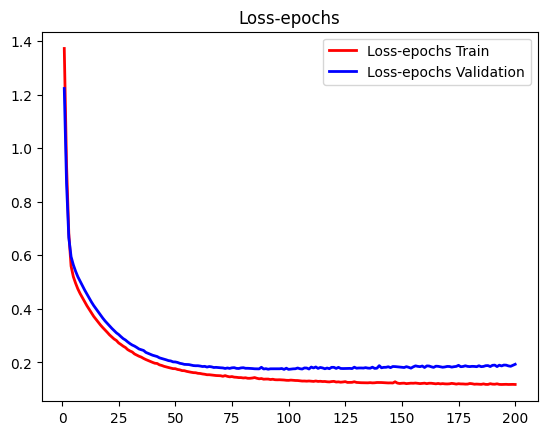

In [17]:
plt.plot(epochs,train_loss,label='Loss-epochs Train',color='r',lw=2)
plt.plot(epochs,val_loss,label='Loss-epochs Validation',color='b',lw=2)
plt.title('Loss-epochs')
plt.legend()

**We finished our job successfully with an acceptable performance and accuracy. Now lets try some other model structures to see the results.**

---